<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/perceptron_iris_scilkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# implement a perceptron to classifiy iris using Scikit-Learn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler

In [5]:
iris = datasets.load_iris()
x = iris.data[0:100,[2,3]]     # petal length and petal width
y = iris.target[0:100]

print(x[0:5,:])
print('Class labels:', np.unique(y))
labels = ['setosa', 'versicolor', 'virginica']

# standarization 
sc = StandardScaler()
sc.fit(x)   # to estimate mean and standard deviation
xstd = sc.transform(x) 
x = xstd
print(x[0:5,:])

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
Class labels: [0 1]
[[-1.01297765 -1.04211089]
 [-1.01297765 -1.04211089]
 [-1.08231219 -1.04211089]
 [-0.94364311 -1.04211089]
 [-1.01297765 -1.04211089]]


In [6]:
# import a model
#!pip install ....
model = Perceptron(max_iter=100, eta0=0.01, random_state=1)
model.fit(x, y)
y_pred=model.predict(x)

print(model.coef_, model.intercept_)

error=np.mean((y-y_pred)**2)
print(error)

[[0.01664029 0.00711338]] [0.]
0.0


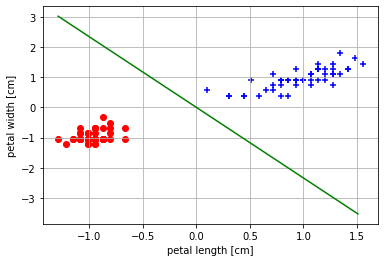

In [7]:
#plot decision line
plt.scatter(x[y==0,0],x[y==0,1], color='red', marker='o',label=labels[0])
plt.scatter(x[y==1,0],x[y==1,1], color='blue', marker='+',label=labels[1])

xx = np.arange(x[:,0].min(),x[:,0].max(),0.1)
yy = -model.coef_[0,0]/model.coef_[0,1] * xx - model.intercept_/model.coef_[0,1]
plt.plot(xx,yy,'g-')
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.grid()
plt.show()

In [39]:
# Another way for plotting the decision line/region
def plot_decision_region(x, y):
  x1 = np.arange(x[:,0].min()-1, x[:,0].max()+1,0.1)
  x2 = np.arange(x[:,1].min()-1,x[:,1].max()+1, 0.1) 

  xg1, xg2 = np.meshgrid(x1, x2)

  #print(xg2.flatten().T) # ravel()/flatten() returns a flattened one-dimensional array
  z = model.predict(np.array([xg1.ravel(), xg2.ravel()]).T)

  plt.contourf(xg1, xg2, z.reshape(xg1.shape))

  #plot the scatter plot of the dataset
  plt.scatter(x[y==0,0],x[y==0,1],color='yellow', marker='o' )
  plt.scatter(x[y==1,0],x[y==1,1],color='black', marker='d')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.show()

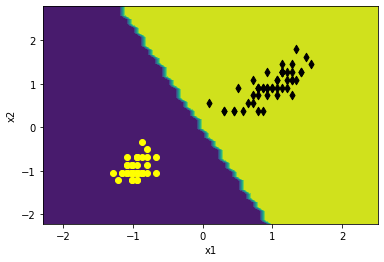

In [40]:
plot_decision_region(x,y)

In [55]:
# split the dataset into training and testing sets using (train_test_split) function
# this function shuffels the training sets internally before splitting
from sklearn.model_selection import train_test_split

xtarin, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)
print(ytest)
print('proportion of class labels in train and test sets:\n',np.bincount(ytrain), np.bincount(ytest))
#stratify: to have the same proportional of class labels in both training and testing sets (balanced sets)
xtarin, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)
print('proportion of class labels in train and test sets:\n',np.bincount(ytrain), np.bincount(ytest))


[1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0]
proportion of class labels in train and test sets:
 [36 34] [14 16]
proportion of class labels in train and test sets:
 [35 35] [15 15]
